# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget svgling

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### 1-2. 라이브러리 import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

### 1-3. 한글 글꼴 설정

In [ ]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결(Colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.데이터 불러오기

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [ ]:
PATH = '/content/drive/MyDrive/미프4_2'

train_df = pd.read_csv(os.path.join(PATH, 'train.csv'))
test_df = pd.read_csv(os.path.join(PATH, 'test.csv'))
# test_df = test_df.rename(columns=columns_dict)
print(train_df.shape)
print(test_df.shape)

(3706, 2)
(929, 2)


### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2
5,"저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한...",이론
6,PDF파일을 보시면 7페이지에 제안사 인프라는 3Tier로 구성(WEB/WAS/DB...,웹
7,범주형 데이터와 숫자형 데이터 설명해주신 내용 잘 읽었습니다. 계속 읽고 적응해나아...,이론
8,첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...,코드1
9,다시 쳐보기도 하면 오타 확인했지만 오타는 없었습니다. 그리고 해당 index파일도...,웹


코드2       1097
웹          732
이론         728
시스템 운영     561
코드1        488
원격         100
Name: label, dtype: int64

----------------------------------------------------------------------------------------------------


코드2       0.296006
웹         0.197518
이론        0.196438
시스템 운영    0.151376
코드1       0.131678
원격        0.026983
Name: label, dtype: float64

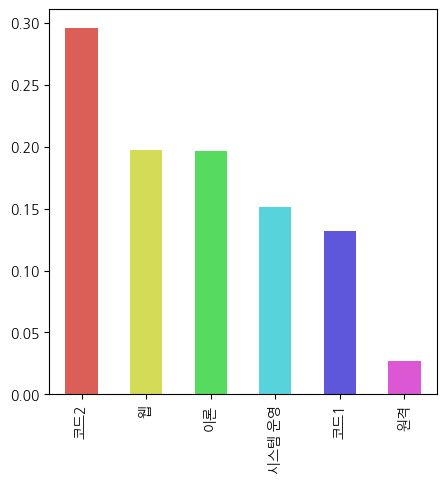

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


,text,label
count,3706,3706
unique,3706,6
top,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
freq,1,1097


In [ ]:
display(train_df.head(10))
# label 데이터 분포를 확인합니다.
display(train_df.label.value_counts())
print("-"*100)
norm_label = train_df.label.value_counts(normalize=True)
display(norm_label)
norm_label.plot.bar(figsize=(5,5),color=sns.color_palette('hls',n_colors = len(norm_label)))
plt.show()
train_df.info()
display(train_df.describe(include='all'))

## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

------------------------------------------------------------------------------------------------------------------------
최대 길이:  sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs

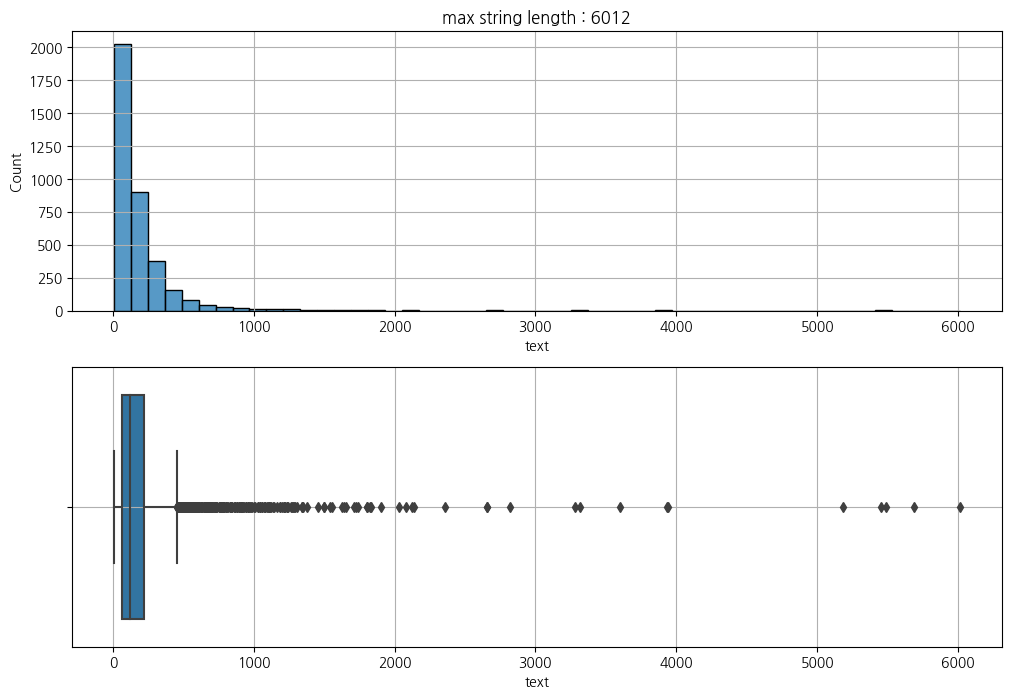

In [ ]:
print("-"*120)
text_length = train_df.text.str.len()
print("최대 길이: ", train_df.text[text_length.argmax()],text_length.argmax())
print("최소 길이: ", train_df.text[text_length.argmin()],text_length.argmin())
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1, title="max string length : "  + str(max(text_length)) )
sns.histplot(text_length, bins=50)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x=text_length)
plt.grid()
plt.show()

### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

In [ ]:
import nltk
nltk.download('stopwords')
from konlpy.tag import Okt
from mecab import MeCab
mecab = MeCab()
okt = Okt()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
if 'okt_morphs' not in globals():
    %time okt_morphs = train_df.text.apply(lambda t:okt.morphs(str(t)))
    %time okt_nouns = train_df.text.apply(lambda t:okt.nouns(str(t)))
    %time okt_pos = train_df.text.apply(lambda t:okt.pos(str(t),norm=True,stem=True,join=True))

CPU times: user 55 s, sys: 781 ms, total: 55.8 s
Wall time: 47 s
CPU times: user 30.9 s, sys: 67.6 ms, total: 31 s
Wall time: 30.8 s
CPU times: user 57.1 s, sys: 248 ms, total: 57.3 s
Wall time: 54.6 s


In [ ]:
def mecab_tokenizer(string):
    return list("/".join(res) for res in mecab.pos(str(string)))

In [ ]:
if 'morphs' not in globals():
    %time morphs = train_df.text.apply(lambda t:mecab.morphs(str(t)))
    %time nouns = train_df.text.apply(lambda t:mecab.nouns(str(t)))
    %time pos_tuple = train_df.text.apply(lambda t:mecab.pos(str(t)))
    %time pos = train_df.text.apply(mecab_tokenizer)

CPU times: user 3.36 s, sys: 29.3 ms, total: 3.39 s
Wall time: 3.43 s
CPU times: user 4.86 s, sys: 29.9 ms, total: 4.88 s
Wall time: 5.85 s
CPU times: user 3.4 s, sys: 57.7 ms, total: 3.46 s
Wall time: 3.47 s
CPU times: user 3.64 s, sys: 53.9 ms, total: 3.7 s
Wall time: 3.71 s


In [ ]:
# Number of Samples / Number of words per sample
len(pos)/pos.apply(len).mean()

46.16679215855003

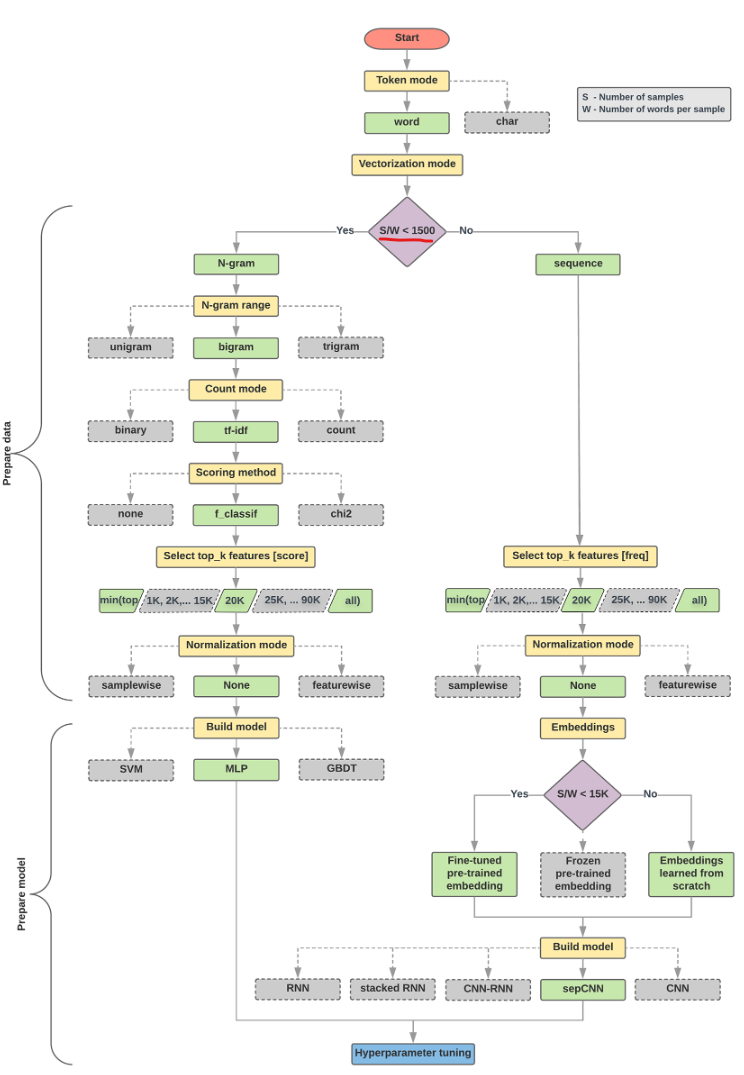

### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

In [ ]:
%%time
nltk_nouns = nltk.Text(nouns.explode())
nltk_nouns = nltk.Text([w for w in nltk_nouns if isinstance(w,str)])
nltk_morphs = nltk.Text(morphs.explode())
nltk_morphs = nltk.Text([w for w in nltk_morphs if isinstance(w,str)])
nltk_pos = nltk.Text(pos.explode())
nltk_pos_tuple = nltk.Text(pos_tuple.explode())

NameError: ignored

In [ ]:
display(nltk_nouns.vocab())
print(len(nltk_nouns.vocab()))

FreqDist({'것': 1093, '수': 986, '값': 801, '데이터': 783, '문제': 725, '때': 714, '코드': 712, '실습': 609, '번': 596, '파일': 581, ...})

3423


In [ ]:
display(nltk_pos.vocab())
print(len(nltk_pos.vocab()))

FreqDist({'(/SSO': 6450, ',/SC': 6342, '-/SY': 5845, './SF': 5557, ')/SSC': 5517, '_/SY': 5425, './SY': 5226, '=/SY': 4081, '하/XSV': 3605, '가/JKS': 3373, ...})

11980


In [ ]:
display(nltk_morphs.vocab())
print(len(nltk_morphs.vocab()))

FreqDist({'.': 10783, '(': 6452, ',': 6362, '-': 5845, ')': 5668, '_': 5425, '하': 5410, '는': 4475, '이': 4155, '=': 4081, ...})

11066


In [ ]:
len(set(nltk_nouns))/len(nltk_nouns)

0.060026304252520826

In [ ]:
len(set(nltk_pos))/len(nltk_pos)

0.040269449000994974

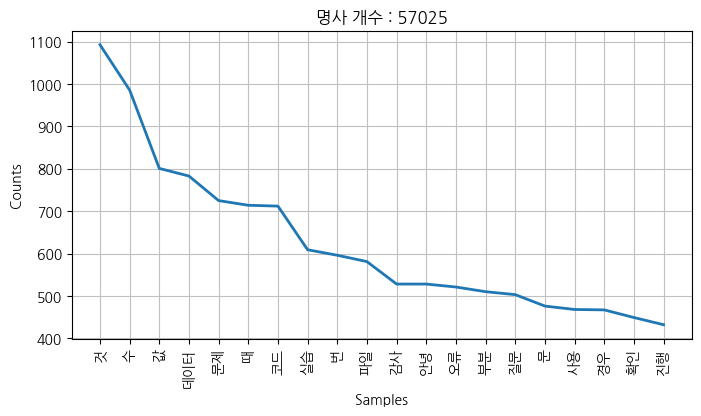

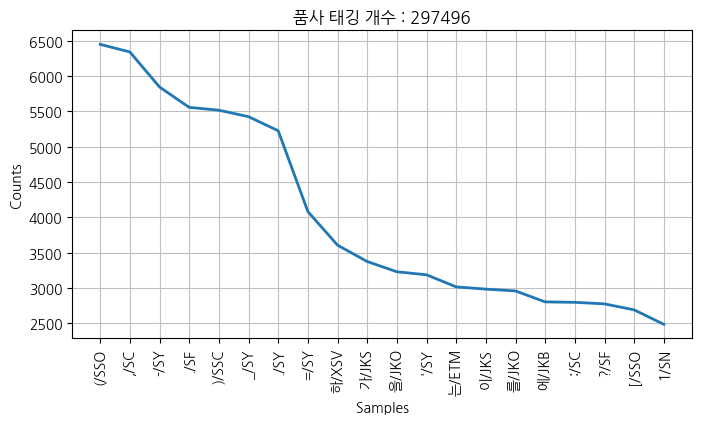

In [ ]:
plt.figure(figsize=(8,4))
plt.title("명사 개수 : " + str(len(nltk_nouns.tokens)))
nltk_nouns.plot(20)
plt.show()
plt.figure(figsize=(8,4))
plt.title("품사 태깅 개수 : " + str(len(nltk_pos.tokens)))
nltk_pos.plot(20)
plt.show()

In [ ]:
nltk_nouns.concordance("코드", lines=10)
print("*"*100)
nltk_nouns.similar("코드")

Displaying 10 of 712 matches:
 업로드 자바 스크립트 동적 폼 개 생성 데 클릭 뭘 수 기본 예제 코드 이유 뭘까요 사용 때 질문 포함 작동 것 질문 제공 파일 폴더 포함
석 아래 가설 검증 방향 접근 방법 비 비 생각 첨부 파일 번 정답 코드 시 패스 출력 문제 요구 건 오답 경우 코드 것 웹 해킹 공부 리 
각 첨부 파일 번 정답 코드 시 패스 출력 문제 요구 건 오답 경우 코드 것 웹 해킹 공부 리 큰따옴표 따옴표 백 슬래시 데이터베이스 전달 
슬라이딩 퍼즐 문제 관련 질문 줄 처 숫자 빈칸 공백 입력 것 이해 코드 작성 초기 퍼즐 상태 이동 상태 저장 이동 상태 이동 횟수 저장 상
리 이동 완료 배열 대응 값 경우 이동한 상태 저장 이동 횟수 다음 코드 작성 예제 입력 정답 것 확인 채점 결과 테스트 케이스 결과 제 부
입력 정답 것 확인 채점 결과 테스트 케이스 결과 제 부분 생각 것 코드 문제 문 감사 강사 참조 자료 아래 강사 거 표 생성 위 자료 코드
코드 문제 문 감사 강사 참조 자료 아래 강사 거 표 생성 위 자료 코드 참조 작성 에러 위 에러 문구 안녕 선형 회귀 로지스틱 회귀 때 사
 저 정의 오류 부분 지 모델 생성 때 방법 설정 선언 걸까요 에러 코드 어디 건지 수 금요일 홈페이지 점검 내용 금일 접속 곳 접속 코딩 
후 부팅 동일 증상 문의 감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 
감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 액 식 차트 에러 데이터 
****************************************************************************************************
제 것 파일 값 번 실행 실습 문제 방법 문 수 오류 감사 위 발생 부분 에러 모델 함수 사용


In [ ]:
nltk_nouns.common_contexts(["코드","오류"])

위_실행 위_오류 것_강의 위_부분 작성_위 때_것 다음_에러 작성_문제 다음_데이터 해당_실행


In [ ]:
nltk_morphs.collocations(window_size=5)
print("*"*50)
nltk_nouns.collocations(window_size=5)
print("*"*50)
nltk_pos.collocations(window_size=5)

Programs Python; site packages; Users User; lib site; int input; lib
packages; Users AppData; User AppData; Local Programs; AppData Local;
AppData Programs; User Local; level pnu; Local Python; Python Python;
map int; seoul moving; input split; Python lib; site django
**************************************************
데이터 프레임; 케이스 케이스; 라우팅 테이블; 인구수 인구수; 데이터 데이터; 충청북도 충청남도; 기준일 기준일; 테스트
케이스; 하이퍼 파라미터; 대구분 대구분; 리스트 리스트; 강원도 충청남도; 충청북도 강원도; 데이터 전처리; 문자열 문자열;
가중치 가중치; 주피터 노트북; 수원시 수원시; 홍길동 일지매; 충청남도 강원도
**************************************************
-/SY -/SY; \/SY \/SY; (/SSO )/SSC; //SC //SC; =/SY =/SY; [/SSO ]/SSC;
지/EC 않/VX; 습니다/EF ./SF; 수/NNB 있/VV; 안녕/NNG 세요/EP+EF; ./SY (/SSO; */SY
*/SY; gt/SL ;/SY; 나요/EF ?/SF; _/SY _/SY; \/SY Python/SL; ,/SC ,/SC;
Python/SL \/SY; -/SY -------------------------/SY; for/SL in/SL


In [ ]:
from konlpy.utils import pprint
from nltk import collocations
measures = collocations.BigramAssocMeasures()
print('\nCollocations among tagged words:')

finder = collocations.BigramCollocationFinder.from_words(nltk_pos_tuple)
pprint(finder.nbest(measures.pmi, 10)) # top 5 n-grams with highest PMI

print('\nCollocations among words:')
words = [w for w, t in nltk_pos_tuple]
ignored_words = [u'\\',u'\n']
finder = collocations.BigramCollocationFinder.from_words(words)
finder.apply_word_filter(lambda w: len(w) < 2 or w in ignored_words)
finder.apply_freq_filter(3) # only bigrams that appear 3+ times
pprint(finder.nbest(measures.pmi, 20))



Collocations among tagged words:
[(('"\\\'",', 'SY'), ('"\\\\\'")', 'SY')),
 (('"\\\\",', 'SY'), ('"\\\\\\\\")', 'SY')),
 (('"]\').', 'SY'), ('click', 'SL')),
 (('&,', 'SY'), ('**,', 'SY')),
 (("'~',", 'SY'), ("'!']))", 'SY')),
 (('*%', 'SY'), ('**%%', 'SY')),
 (('**%%', 'SY'), ('***%%%', 'SY')),
 (('***%%%', 'SY'), ('****%%%%', 'SY')),
 (('****%%%%', 'SY'), ('*****%%%%%', 'SY')),
 (("+'", 'SY'), ("'+", 'SY'))]

Collocations among words:
[('algorithm', 'worked'),
 ('example', 'they'),
 ('Amazon', 'Linux'),
 ('For', 'example'),
 ('contain', 'infs'),
 ('unsupported', 'operand'),
 ('경쟁', '우위'),
 ('자연', '스럽'),
 ('제론', '테크'),
 ('CJ', 'ENM'),
 ('EPKFA', 'MINGW'),
 ('Quota', 'exceeded'),
 ('elementwise', 'comparison'),
 ('passing', 'other'),
 ('디렉', '토리'),
 ('Graph', 'execution'),
 ('ORDER', 'BY'),
 ('Random', 'Forest'),
 ('StatReloader', 'Performing'),
 ('프레', '미스')]


In [ ]:
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"

In [ ]:
# parser_ko = nltk.RegexpParser(grammar)
# chunks_ko = parser_ko.parse(pos_tuple[train_df.text.str.len().argmin()])
# chunks_ko.draw()

### 3-4. Wordcloud 만들기
*  이전에 생성한 nltk Text를 활용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

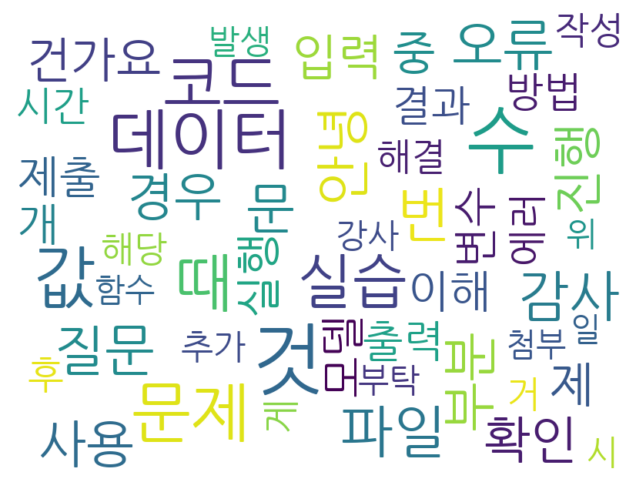

In [ ]:
cloud = WordCloud(
        max_font_size=100, max_words=50,
        background_color='white', relative_scaling=.5,
        width=800, height=600, font_path=FONT_PATH).generate_from_frequencies(nltk_nouns.vocab())
plt.figure(figsize=(12, 6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

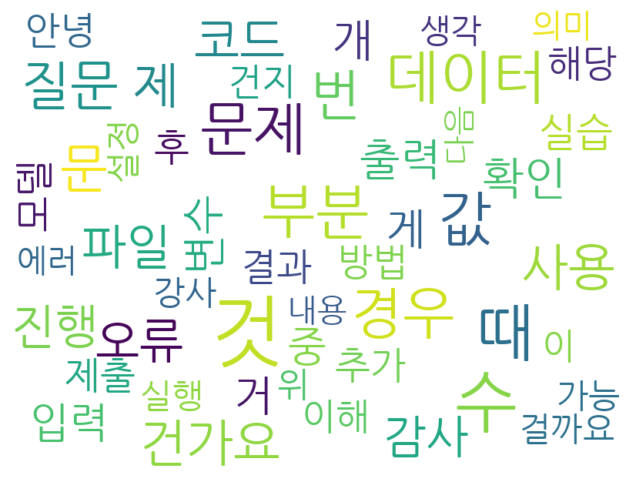

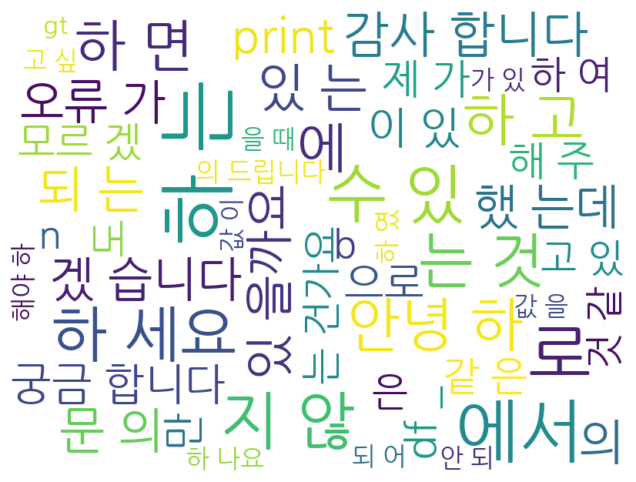

In [ ]:
cloud = WordCloud(
        max_font_size=100, max_words=50,
        background_color='white', relative_scaling=.5,
        width=800, height=600, font_path=FONT_PATH).generate(" ".join(nltk_nouns))
plt.figure(figsize=(12, 6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()
cloud = WordCloud(
        max_font_size=100, max_words=50,
        background_color='white', relative_scaling=.5,
        width=800, height=600, font_path=FONT_PATH).generate(" ".join(nltk_morphs))
plt.figure(figsize=(12, 6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [ ]:
def text_analysis(df, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """
    pass
    print("*"*120)
    if label is None:
        text_question = df['text'].reset_index(drop=True)
        display(df.label.value_counts())
        norm_label = df.label.value_counts(normalize=True)
        display(norm_label)
        norm_label.plot.bar(figsize=(5,5),color=sns.color_palette('hls',n_colors = len(norm_label)))
        plt.show()
        df.info()
    else:
        text_question = df.loc[train_df['label'] == label, 'text'].reset_index(drop=True)
        display(f"유형: {label}",text_question.head(10))
    # 데이터 확인
    display(text_question.describe(include='all'))
    # 데이터 길이 분포 시각화

    text_length = text_question.apply(len)
    display(pd.DataFrame(text_length).describe().T)
    print("-"*120)
    print("최대 길이: ", text_question[text_length.argmax()])
    print("최소 길이: ", text_question[text_length.argmin()])

    plt.figure(figsize=(12, 8))
    plt.subplot(2,1,1, title="max string length : "  + str(max(text_length)) )
    sns.histplot(text_length, bins=50)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x=text_length)
    plt.grid()
    plt.show()
    print("-"*120)

    nouns = text_question.apply(lambda t:mecab.nouns(str(t)))
    nouns = nltk.Text(nouns.explode())
    nouns = nltk.Text([w for w in nouns if isinstance(w,str)])
    #word cloud
    cloud = WordCloud(
        max_font_size=100, max_words=50,
        background_color='white', relative_scaling=.5,
        width=800, height=600, font_path=FONT_PATH).generate(" ".join(nouns))
    plt.figure(figsize=(10, 8))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    display(nouns.vocab().most_common(n=10))

### 4-2. 각각의 문의 유형에 대해 실행합니다.

************************************************************************************************************************


'유형: 시스템 운영'

0           한달에 한번 지원금 들어오기로 했는데 국민 내일배움카드로 입금은 언제되나요?
1    안녕하세요 \n\n코딩마스터스 재밌게 하고 있는 에이블러입니다.\n\n코딩마스터스가...
2    금요일에 홈페이지 점검이 있다는 내용을 들었었는데, 금일 접속해 보니 다른 곳은 다...
3    운영자 02님 혹시 원격 기다리실까봐 문의글 남깁니다.\n어차피 오전시간 얼마 안 ...
4    안녕하세요 DX7조입니다.\n제출 버튼에 ppt 파일을 먼저 제출하고 나서 발표영상...
5    안녕하세요!\n\n갑자기 셀프 테스트를 보는 도중 창이 다 꺼지고 홈으로 돌아갔는데...
6    AIDU 환경에서 한번 나오면 시험 끝이라는 강사님 말씀을 듣고 질문을 남깁니다.\...
7    최종개별실습 파일제출시에 제가 다른 경로로 저장한 빈파일을 올려서 \n소스코드가 하...
8    채점 했을때는 전부 pass로 뜨는데 제출하면 오답이라고 하는데 제출할 때 다른 케...
9    11월 10일 개인과제 제출 버튼을 누르면 아래와 같은 화면이 뜨면서 과제 제출이 ...
Name: text, dtype: object

count                                            561
unique                                           561
top       한달에 한번 지원금 들어오기로 했는데 국민 내일배움카드로 입금은 언제되나요?
freq                                               1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,561.0,89.613191,71.10484,10.0,46.0,71.0,113.0,650.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  안녕하십니까 다름아니라 8월 11일에 치룬 셀프테스트 결과를 확인하고 문의드릴점이 있어 글을 작성하게되었습니다 다름아니라 A-2번 문제는 실습A-2에서 실수값을 갖는 열의 개수를 구하는 문제입니다 저는 해당 문제를 풀기위해 info()함수를 제대로 이용하여 실수형 열의 개수를 구했습니다 저는 앞선 문제에서 mall 데이터에 열을 추가하는 문제를 먼저 푸는 바람에 A-2번 문제를 풀게되었을때 실수형태의 열 개수가 추가되어 기존의 실수형 형태의 열 개수가 2개에서 3개로 바뀌어 제 답안에는 실수형 열 개수가 3개라는 결과를 얻게되었습니다ㅠㅠ.. 이 경우에는 부분점수를 받거나 점수 변동이 가능할까요? 제 실습 파일을 보면 알 수 있듯이 사용해야하는 함수도 제대로 썼지만 앞서 열 추가 문제를 먼저 푸는 바람에 A-2번 문제를 풀때 열추가가된 것 같습니다.. 

추가로 95점 이상 남성을 구하는 문제에 있어 제가 등호표시를 &gt;로만 하여 아쉽게 오답으로 처리되었는데요.. 이 경우도 부분점수를 받을 수 있을까요?? 

그리고 이번 미니프로젝트 개별실습 채점방식은 앞서 오티때 말씀해주신것처럼 0~100점 형태의 점수표기가 아닌 NP/P 로 채점되는것인가요?? 

잘하고싶은 마음에 사소한것까지 하나하나 물어보게되었습니다 항상 성의껏 답변해주셔서 감사합니다!
최소 길이:  제출 오류가 뜹니다


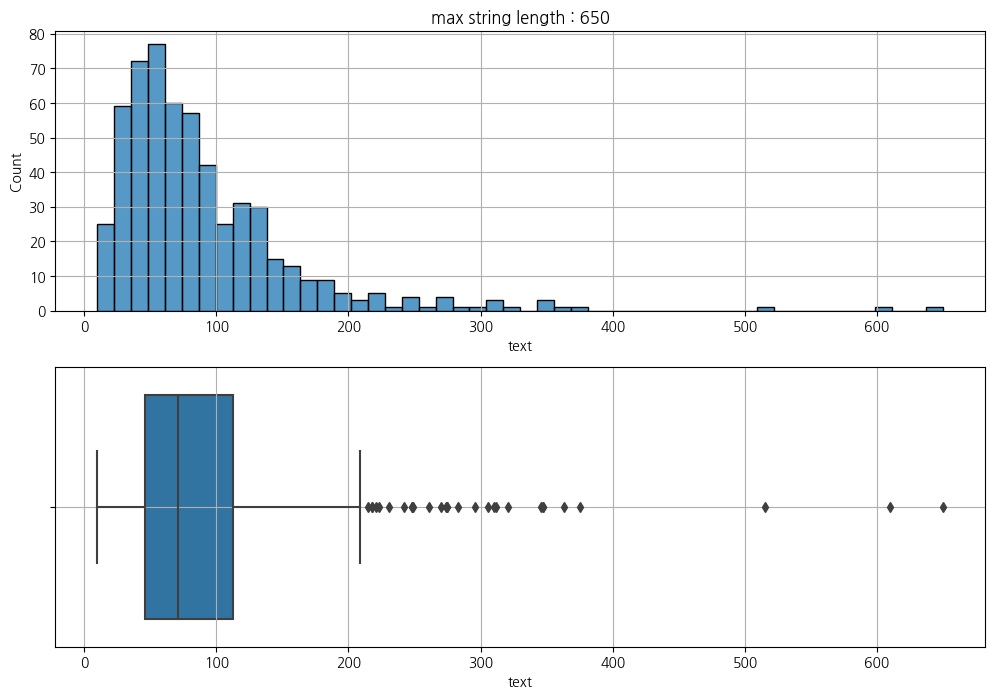

------------------------------------------------------------------------------------------------------------------------


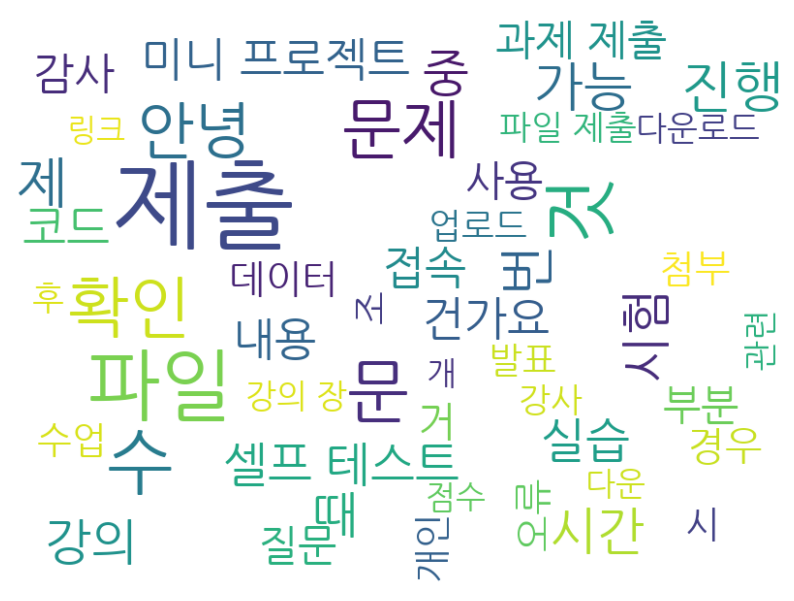

[('제출', 316),
 ('파일', 224),
 ('수', 132),
 ('확인', 125),
 ('것', 124),
 ('안녕', 113),
 ('문제', 112),
 ('문', 103),
 ('강의', 103),
 ('실습', 97)]

************************************************************************************************************************


'유형: 원격'

0    말씀하신대로 하였으나, 이번에는 이런 오류가 발생합니다.\n\ncannot impo...
1                  어떻게 삭제하는지 모르겠어요 ㅜ 원격지원 부탁드려도 될까요.. 
2    마지막으로 안내해주신 명령어대로 수행해봤는데 역시 에러메시지가 뜹니다 ㅠㅠ\n혹시 ...
3    https://113366.com?accessCode=107144링크로 접속 후 프...
4    네트워크 오류 관련 알려주신 내용 확인해 봤는데 안됩니다,,,, 원격 부탁드려도 되...
5    튜터님,\n\n말씀해주신 urls.py 부분 해결하였습니다. 감사합니다.\n\n하지...
6                                   원격제어를 추가하는 것이 안됩니다
7                       1대1 원격조종으로 문제 해결 위해 남겨둔 질문입니다.
8    강사님께서 프로그램 다 종료하고 다시 가이드대로 해보라고 하셨는데도 계속 버츄얼 네...
9                        안녕하세요 깃허브 등록이안되서 원격제어 부탁드립니다.
Name: text, dtype: object

count                                                   100
unique                                                  100
top       말씀하신대로 하였으나, 이번에는 이런 오류가 발생합니다.\n\ncannot impo...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,100.0,84.02,86.997037,9.0,39.75,58.0,104.25,683.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  튜터님,

말씀해주신 urls.py 부분 해결하였습니다. 감사합니다.

하지만 아래 코드 실행시 또다른 에러가 발생합니다.
- C:\dev\mini_pro7&gt;python manage.py migrate
- C:\dev\mini_pro7&gt;python manage.py runserver

에러내용은 아래와 같습니다.
- OSError: [WinError 123] 파일 이름, 디렉터리 이름 또는 볼륨 레이블 구문이 잘못 
되었습니다: ''
- ModuleNotFoundError: No module named 'reference.urls'

문제 해결을 위해 https://bladewalker.tistory.com/713와 https://stackoverflow.com/questions/58873810/django-runserver-error-frozen-importlib-bootstrap를 참조하여
-  pip install --upgrade reference
- C:\dev\mini_pro7&gt;python manage.py makemigrations
코드를 실행하였으나 지속적으로 또다른 오류가 발생합니다.

---

다른 팀원분들께 여쭤보니 파이썬을 다시 삭제후 재설치를 권유하던데, 혹시 삭제후 재설치를 해야 할까요?
번거로우시겠지만, 원격으로 가상환경 세팅 도와주시면 정말 감사드리겠습니다.

최소 길이:  원격 부탁드립니다


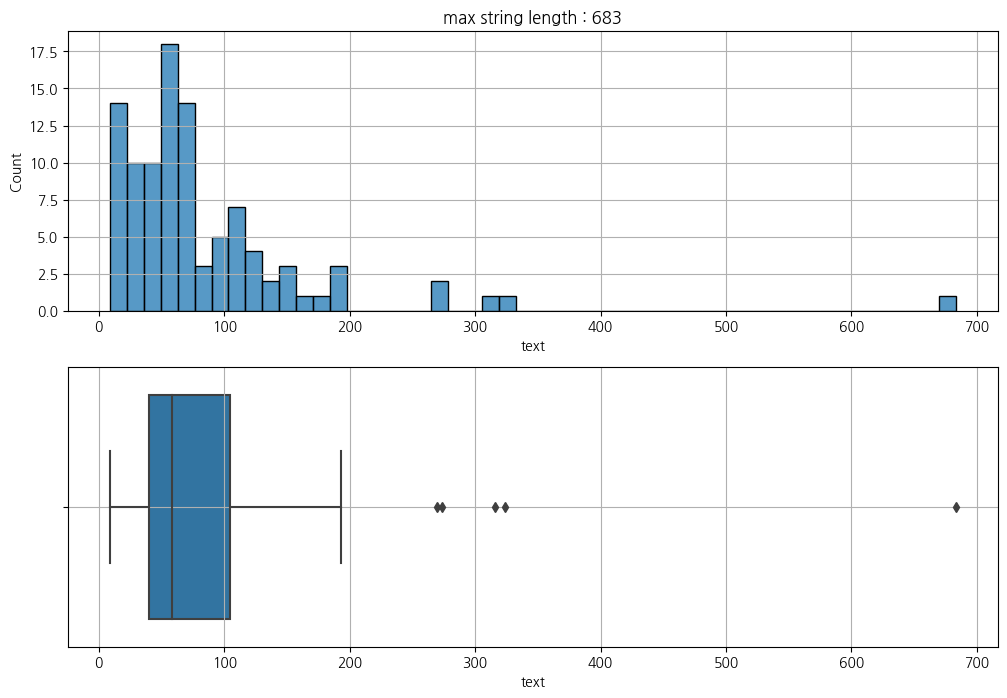

------------------------------------------------------------------------------------------------------------------------


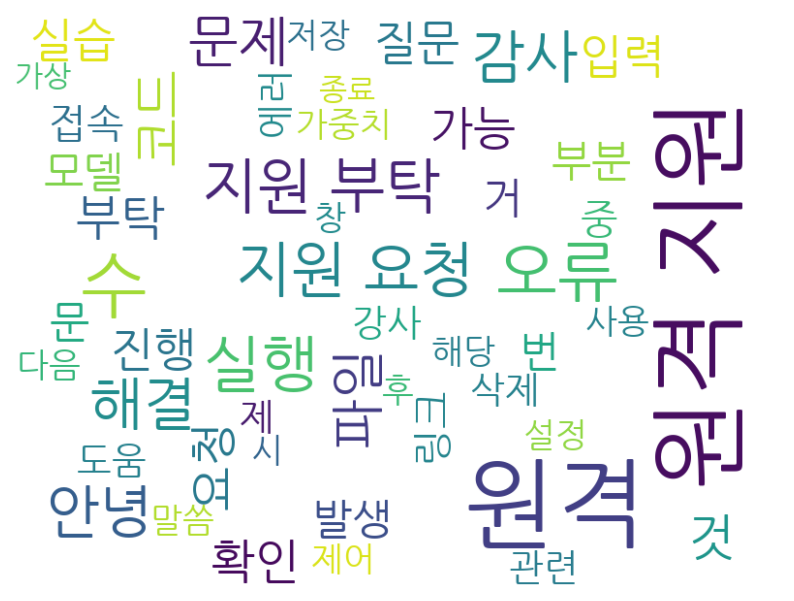

[('원격', 98),
 ('지원', 51),
 ('부탁', 26),
 ('요청', 26),
 ('수', 23),
 ('오류', 19),
 ('실행', 17),
 ('해결', 15),
 ('감사', 15),
 ('안녕', 15)]

************************************************************************************************************************


'유형: 웹'

0    현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...
1    PDF파일을 보시면 7페이지에 제안사 인프라는 3Tier로 구성(WEB/WAS/DB...
2    다시 쳐보기도 하면 오타 확인했지만 오타는 없었습니다. 그리고 해당 index파일도...
3    윈도우 프롬프트에서 작업중 cd Downloads 이후 퍼블릭 DNS를 연결하면 e...
4    아니면 혹시 인스턴스가 종료되었는데 삭제하기가 보이지가 않아서 새로운 인스턴스를 만...
5    두번째로 주신 OneDrive에 window10.ova파일이 아직 업로드 되지 않은...
6    google sheet의 제  master IP를 찾아 복사한 뒤 인스턴스 목록에서...
7    라우팅 테이블 설정에서 프라이빗서브넷이 퍼블릭 라우팅 테이블로 설정을 하였습니다.\...
8    강사님이 주신 참조자료 보면서 만들고 있습니다.\nhttps://findwork.d...
9    아까 rows에서 s빼먹어서 넣고 다시 돌려봤을때는 분명 열 저체가 다 나왔었거든요...
Name: text, dtype: object

count                                                   732
unique                                                  732
top       현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,732.0,184.84153,448.83214,13.0,60.0,101.0,172.0,5690.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  $ python manage.py createsuperuser

You have 18 unapplied migration(s). Your project may not work properly until you apply the migrations for app(s): admin, auth, contenttypes, sessions.
Run 'python manage.py migrate' to apply them.
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\django\db\backends\utils.py", line 84, in _execute
    return self.cursor.execute(sql, params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\django\db\backends\mysql\base.py", line 73, in execute
    return self.cursor.execute(query, args)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\MySQLdb\cursors.py", line 206, in execute
    res = self._query(query)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\MySQLdb\cursors.py", l

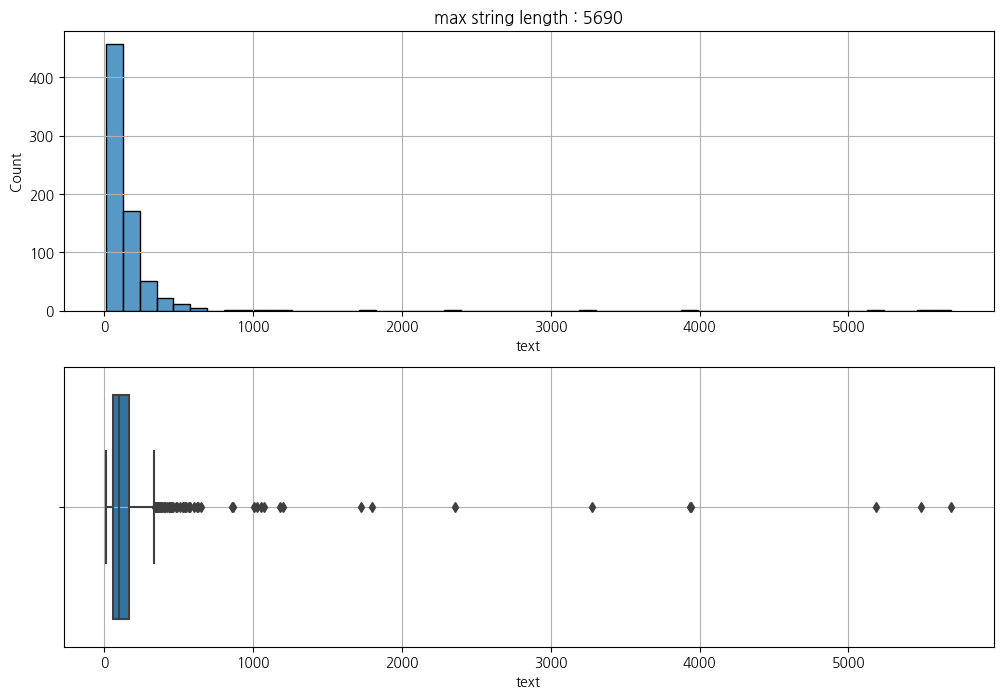

------------------------------------------------------------------------------------------------------------------------


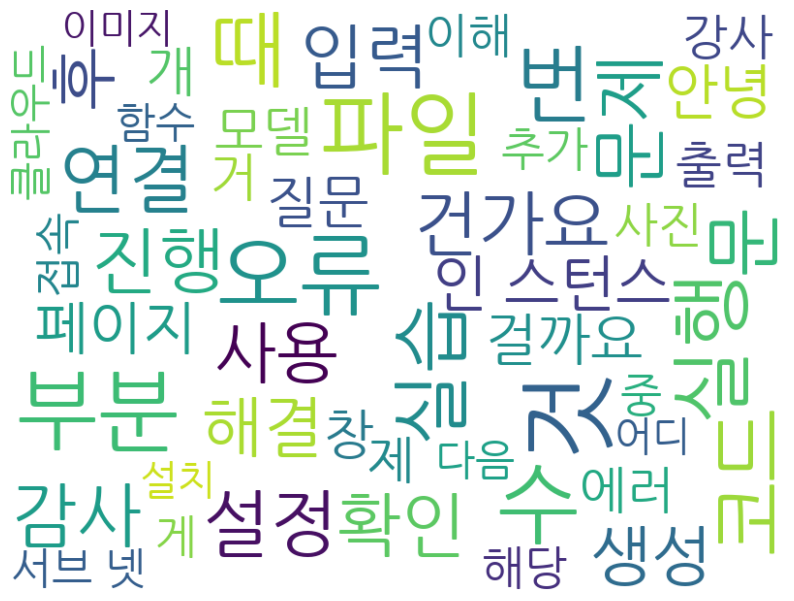

[('실습', 159),
 ('오류', 146),
 ('수', 142),
 ('것', 137),
 ('파일', 123),
 ('실행', 123),
 ('진행', 109),
 ('부분', 108),
 ('때', 99),
 ('안녕', 99)]

************************************************************************************************************************


'유형: 이론'

0    저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한...
1    범주형 데이터와 숫자형 데이터 설명해주신 내용 잘 읽었습니다. 계속 읽고 적응해나아...
2    안녕하세요.\n\n실습1 제출합니다.\n피드백 부탁드립니다.\n\n+) 추가로, 저...
3    아이피 중에 13.13.12.2와 13.13.23.2가 없는데 어떤 것을 연결하는건...
4    backbone은 기본 골자이고, head는 backbone을 바탕으로 목적에 맞게...
5    3. IDF가 높다는 것은 적은 수의 문서에서 나타난다는 뜻이므로 그 단어가 그 문...
6    [실습4]\n\n쿠팡의 경우 유통업이지만 오픈마켓으로도 분류할 수가 있는데 제가 작...
7    도메인 관련 논문 검색 후 유의미한 feature 1차로 추려내서 데이터 전처리하는...
8    변수와 타겟간 가설수립을 할 때 변수간 관계를 이용해 변수를 추가해서 사용해도 될까...
9    이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경...
Name: text, dtype: object

count                                                   728
unique                                                  728
top       저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,728.0,138.668956,101.730658,13.0,71.0,110.0,178.25,915.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  수업에서 cacoo랑 packet tracer를 배우는 이유가

1. IT 인프라 구조에 대해서 이해해보는 시간
- 비록 직접 인프라를 구축 및 설계는 하지 않을지라도 어떻게 구성되어 있고 어떻게 돌아가는지는 알아보자.
적절한 비유일지는 모르겠으나, 운전을 하는 게 목표라고 할 때, 
우리가 자동차를 직접 설계하고 만들지는 않아도 자동차가 연료를 연소시키면서 엔진에 동력을 전달해서 그 힘으로 움직인다. 라는 식으로 원리와 과정을 아는 것과 같은 맥락...이려나요?

2. (DX과정이므로 DX 컨설턴트 및 관련 직무를 위한 교육이라고 가정할 때) DX 관련 업무에서 실제로 IT 인프라를 구축해야하는 경우가 있으며, 이 때 실제 장비를 가지고 하나씩 연결해보고 시도해보기에는 물리적(시간, 돈, 장소 등)제약이 있으므로 가상으로 해본다.

3. 적절한 비유일지는 모르겠으나...
수학에서 미적분을 배우는 게 최종 목표라고 했을 때, 처음부터 미적분을 학습시킬 수 없으니 그 기초가 되는 수열, 수열의 극한, 함수의 극한 순으로 배우듯이 DX 컨설턴트 과정에서 기초라 할 수 있는 IT 인프라를 학습하는 과정에 있는 것이다.

상기한 3가지 이유인가요?

이전까지 계속 코딩과 데이터 전처리 및 분석으로 달려오다가 갑자기 가상 세계 속에서 무언가를 구성해보기도 하고, 도식화 해보기도 하니 순간 이걸 배우는 목적이 무엇인가? 라고 했을 때 말문이 막혀서 한번 질문 드렸습니다.

훌륭한 커리큘럼을 구성한 교육과정에서 배우는 입장에서 이러한 의문을 가지는 게 터무니 없을 수도 있으나 목적의식과 목표에 대해서 알면 무엇을 좀 더 중점적으로 학습해야 할지 알 수 있을 거 같아서 문의드립니다. ^^:

추가적으로 혹시 실례가 안 된다면 실무에서 cacoo와 

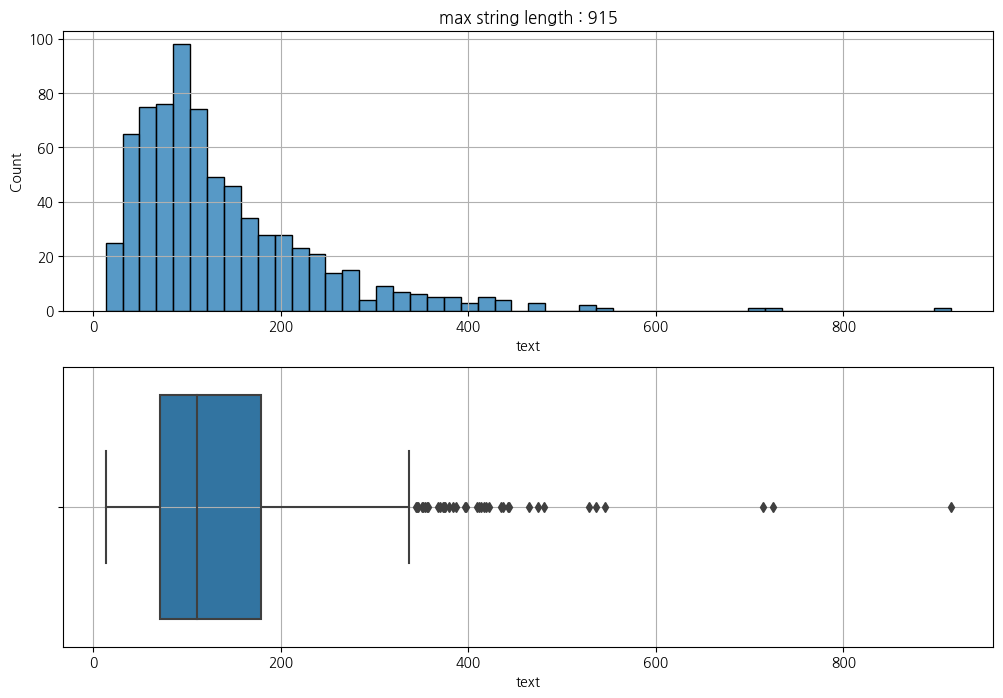

------------------------------------------------------------------------------------------------------------------------


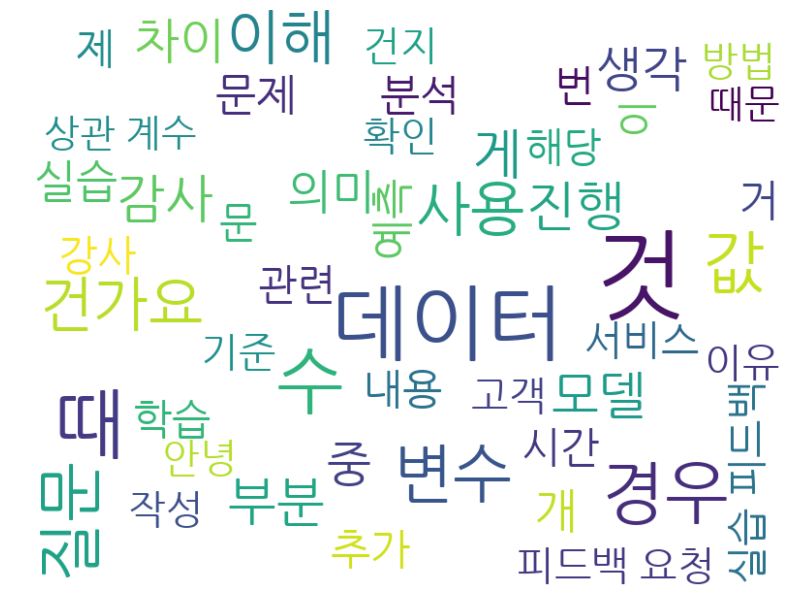

[('것', 375),
 ('데이터', 276),
 ('때', 209),
 ('수', 199),
 ('값', 198),
 ('실습', 172),
 ('경우', 162),
 ('변수', 158),
 ('이해', 151),
 ('질문', 146)]

************************************************************************************************************************


'유형: 코드1'

0    첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...
1    앗...제가 질문을 잘못드려서 혼란이 있으셨을 듯 합니다 죄송합니다...ㅠ\n원질문...
2    제가 All Failed를 말씀드린건.. 실행에는 아무문제가 없기 때문입니다...\...
3    안녕하세요! 3436번. 슬라이딩 퍼즐 문제 관련하여 질문드립니다.\n우선 3줄에 ...
4    안녕하세요, 답변에 감사드립니다. 3389 커트라인 정하기 추가 문의 드립니다. \...
5    52 54 55번은 모두 3360번 문제입니다..\n\n추가로 반복문 안에 조건문이...
6    안녕하세요 3417. 오리 농법 예제 입력 1의 예제 출력 1에 대해 질문 드립니다...
7    함수 say_hey를 만들어 보세요.\n횟수를 받는 입력 매개변수 count(숫자)...
8    w =int(input("수도사용량:"))\nb= input('회사명:')\ndef...
9    파이썬을 이번에 처음 배우게 되었습니다. 코딩마스터즈 테스트에서\n\nfrom sy...
Name: text, dtype: object

count                                                   488
unique                                                  488
top       첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,488.0,333.356557,316.485935,12.0,124.0,242.5,414.0,2655.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  import collections
import re
a=list(input()) # 반복시킬 문자열 받기
b= input() # 목적
c=0 # 반복 횟수
y = [] # 반복할 문자열 갯수 
f = str(a[0]+'+'+a[1]+'+'+a[2]+'+') 

z = re.findall(f, b) 
z = list(str(z)) # z는 반복 대상 문자열
for i in z:
    if i in a:
        y.append(i)   # z중 '' ','등 불필요 문자 제거, 
        
if a[0]==a[1]==a[2]: # 반복시킬 문자열이 모두 같을 때
    d1=collections.Counter(a) # a 문자열 갯수
    d2=collections.Counter(y) # y 문자열 갯수
    while True:
        if d2-d1!=collections.Counter(): # a의 모든 문자가 반복대상 문자보다 수가 적을 때
            a=a*2 # a문자열 반복
            c+=1 # 반복횟수 추가
            d1=collections.Counter(a) # 
            continue
        if d2-d1==collections.Counter(): # a의 모든 문자가 반복대상 문자보다 수가 크거나 같을 때
            print(c)
            break                   
        
elif (a[0]!=a[2]) & (a[0] == a[1]): # AAB와 같은 경우
    d1=collections.Counter(a)
    d2=collections.Counter(y)
    while 

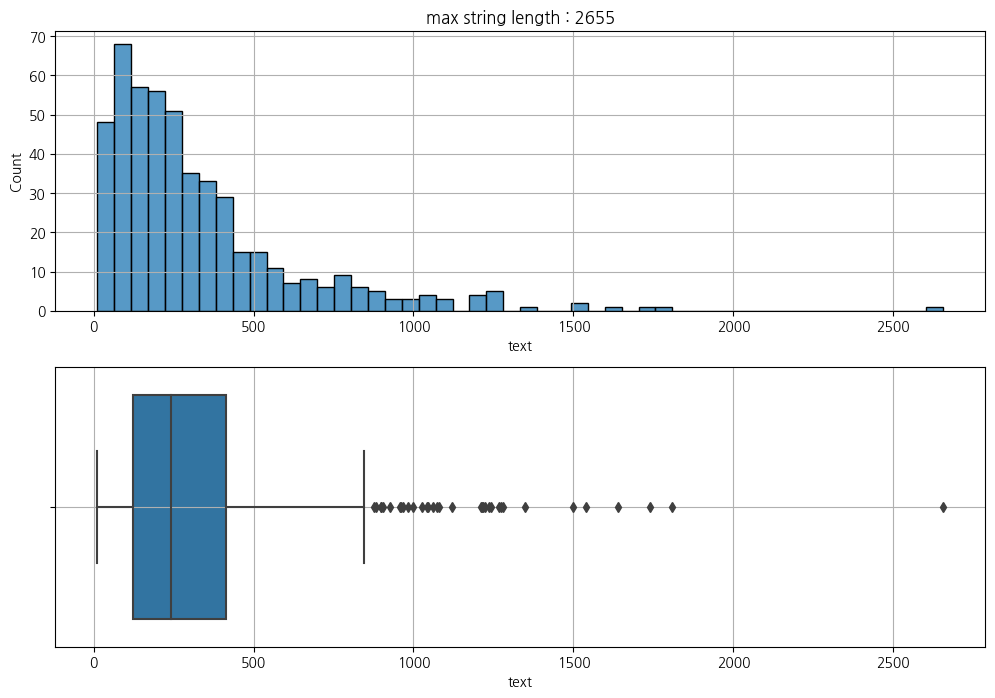

------------------------------------------------------------------------------------------------------------------------


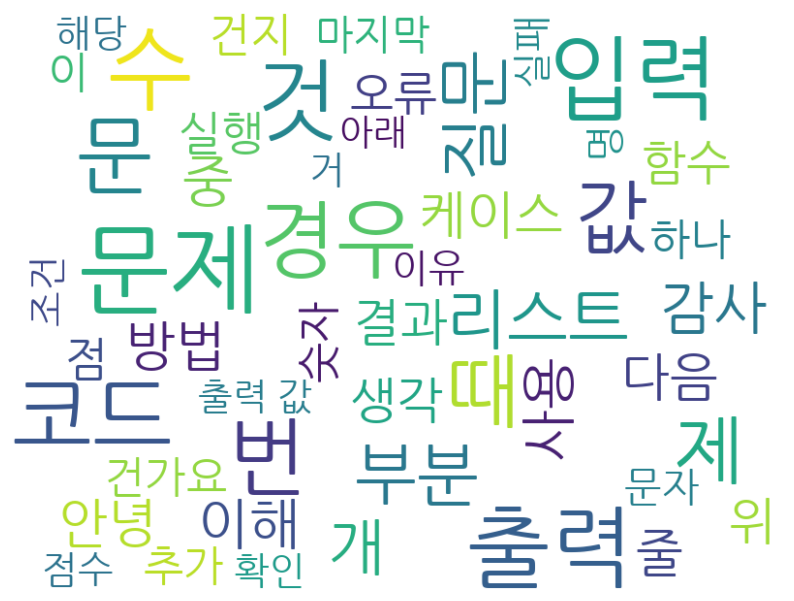

[('문제', 266),
 ('값', 244),
 ('수', 239),
 ('입력', 237),
 ('출력', 216),
 ('코드', 203),
 ('번', 179),
 ('것', 166),
 ('때', 151),
 ('경우', 149)]

************************************************************************************************************************


'유형: 코드2'

0    self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...
1    glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...
2    tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...
3    filename = TEST_IMAGE + str(round(frame_sec)) ...
4    만약\n각각 결측치가 하나씩 있는 경우를 제외하고\nOzone  열에도 Solar....
5    궁금한 사항은 다음과 같습니다.\n1) data에 있는 연속형 변수 A,B가 존재한...
6    model.predict() 에서 \n'float' object cannot be ...
7    x_train = scaler.fit_transform(x_train) \nx_va...
8    train_x,train_y= train_test_split(df_total,tes...
9    모델 학습 시 아래와 같은 error 메세지가 나와서 어떻게 해결해야 할지 문의 드...
Name: text, dtype: object

count                                                  1097
unique                                                 1097
top       self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,1097.0,261.750228,398.162267,13.0,90.0,158.0,285.0,6012.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs

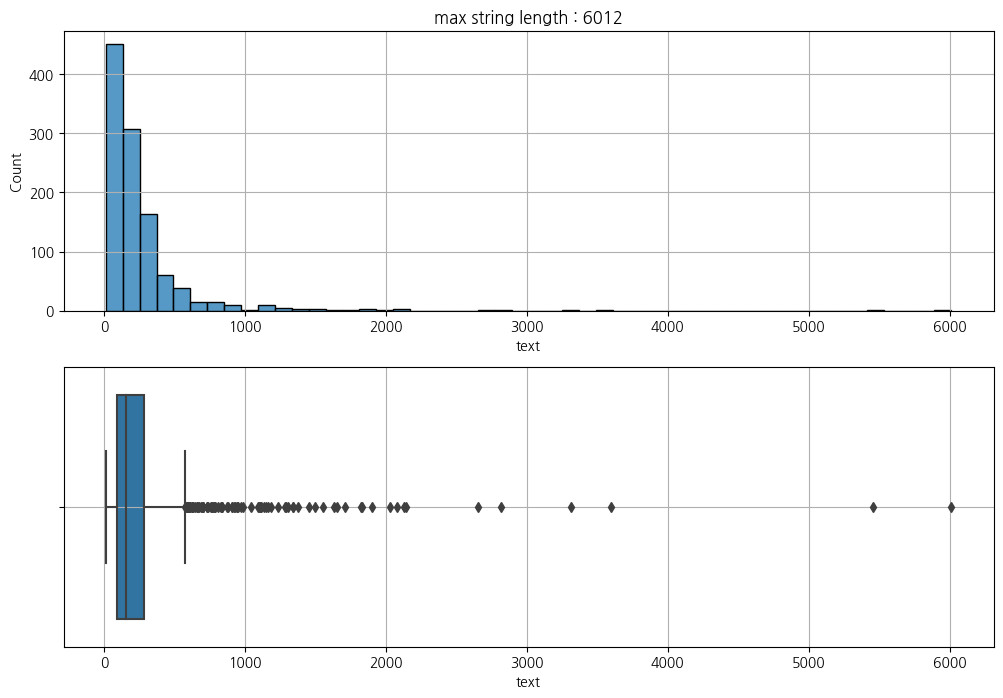

------------------------------------------------------------------------------------------------------------------------


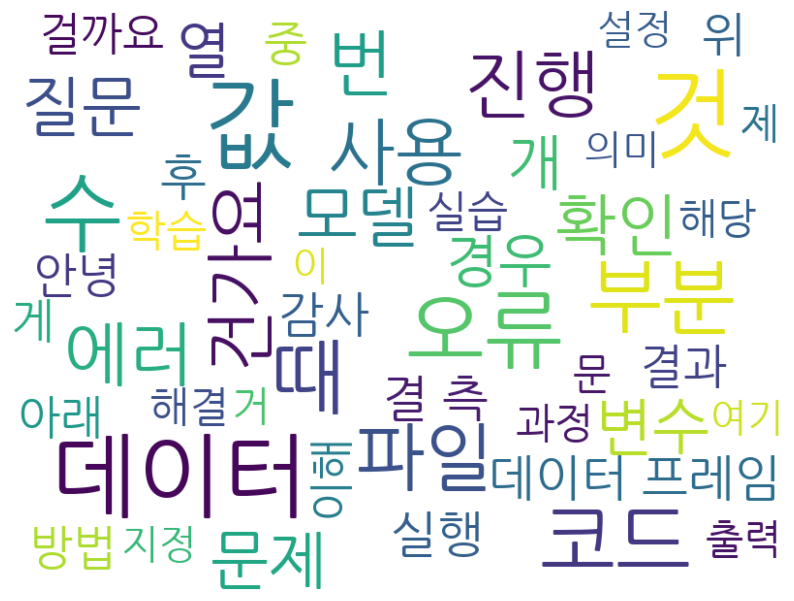

[('데이터', 405),
 ('코드', 336),
 ('값', 303),
 ('것', 280),
 ('오류', 253),
 ('수', 251),
 ('때', 195),
 ('문제', 186),
 ('부분', 173),
 ('에러', 170)]

In [ ]:
for label in sorted(train_df.label.unique()):
    text_analysis(train_df,label)

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
preprocessed_df = train_df.replace({'label': label_dict}).copy()

In [ ]:
text_analysis(preprocessed_df)

NameError: ignored

### 5-2. Train Validation split

In [51]:
X_tr,X_val,Y_tr,Y_val = train_test_split(preprocessed_df.text,preprocessed_df.label, test_size=0.25,random_state=42)

In [ ]:
# import numpy as np
# X_te=pd.read_csv(PATH+"/test.csv")['text']
# Y_te=pd.read_csv(PATH+"/test_label.csv")['label']

## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

In [50]:
import re
import string
#removal_list =  "‘, ’, ◇, ‘, ”,  ’, ', ·, \“, ·, △, ●,  , ■, (, ), \", >>, `, /, -,∼,=,ㆍ<,>, .,?, !,【,】, …, ◆,%"
removal_list =  "‘’◇‘”’'·\“·△●■()\">>`/-∼=ㆍ<>.?!【】…◆%"
removal_list += string.punctuation
def cleansing_special(sentence: str = None) -> str:
    """
    특수문자를 전처리를 하는 함수
    :param sentence: 전처리 대상 문장
    :return: 전처리 완료된 문장
    """
    #sentence = re.sub("[.,\'\"’‘”“!?]", "", sentence)
    sentence = re.sub("[^가-힣0-9a-zA-Z\\s]", " ", sentence)
    sentence = re.sub("\s+", " ", sentence)

    sentence = sentence.translate(str.maketrans(removal_list, ' '*len(removal_list)))
    sentence = sentence.strip()
    return sentence

In [ ]:
for idx, row in preprocessed_df.iterrows():
    sent = row['text']
    if idx < 5:
        print(f"===== {idx} =====")
        print(f"전처리 전: {sent}")
        print(f"전처리 후: {cleansing_special(sent)}")

===== 0 =====
전처리 전: self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, (K, 100)) for K in Ks])
1. 여기서 커널사이즈 K,100 은 한 단어의 최대 길이가 100이 넘지않는다는 가정으로 그냥 100으로 선언한 것인지 궁금합니다.
전처리 후: self convs1 nn ModuleList nn Conv2d 1 Co K 100 for K in Ks 1 여기서 커널사이즈 K 100 은 한 단어의 최대 길이가 100이 넘지않는다는 가정으로 그냥 100으로 선언한 것인지 궁금합니다
===== 1 =====
전처리 전: 현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요... 막혀서 뭘 할 수가 없네요.. 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다. 이유가 뭘까요
전처리 후: 현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요 막혀서 뭘 할 수가 없네요 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다 이유가 뭘까요
===== 2 =====
전처리 전: glob.glob(PATH) 를 사용할 때 질문입니다.

PATH에 [ ] 가 포함되면 제대로 작동하지 않는 것 같아 질문 드립니다.

제공해주신 파일에 AIVLE_3rd[Team] 폴더가 포함되어 있는데, 이 폴더 안에는 glob이 정상적으로 작동하지 않습니다.
전처리 후: glob glob PATH 를 사용할 때 질문입니다 PATH에 가 포함되면 제대로 작동하지 않는 것 같아 질문 드립니다 제공해주신 파일에 AIVLE 3rd Team 폴더가 포함되어 있는데 이 폴더 안에는 glob이 정상적으로 작동하지 않습니다
===== 3 =====
전처리 전: tmpp = tmp.groupby(by = 'Addr1', as_index=False)[['Category']].sum()


plt.figure(figsize=(15, 5))
p

In [52]:
X_tr = X_tr.apply(cleansing_special)
X_val = X_val.apply(cleansing_special)

### 6-2. N-grams (sklearn)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

In [53]:
# N-grams
count_vectorizer = CountVectorizer()
count_mecab_vectorizer = CountVectorizer(tokenizer=mecab_tokenizer)

In [54]:
x_tr_counts = count_vectorizer.fit_transform(X_tr)
x_val_counts = count_vectorizer.transform(X_val)
# x_te_counts = count_vectorizer.transform(X_te)

In [55]:
x_tr_mecab_counts = count_mecab_vectorizer.fit_transform(X_tr)
x_val_mecab_counts = count_mecab_vectorizer.transform(X_val)
# x_te_mecab_counts = count_mecab_vectorizer.transform(X_te)

In [56]:
transformer = TfidfTransformer()
x_tr_tfidf = transformer.fit_transform(x_tr_mecab_counts)
x_val_tfidf = transformer.transform(x_val_mecab_counts)
# x_te_tfidf = transformer.transform(x_te_mecab_counts)

In [57]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=mecab_tokenizer)
x_tr_tfidfv = tfidf_vectorizer.fit_transform(X_tr)
x_val_tfidfv = tfidf_vectorizer.transform(X_val)
# x_te_tfidfv = tfidf_vectorizer.transform(X_te)

In [ ]:
print("Count Vectorizer Vocabulary size : ", len(count_vectorizer.vocabulary_))
print("Count Vectorizer(Mecab tokenizer) Vocabulary size : ", len(count_mecab_vectorizer.vocabulary_))
print("TF-IDF Vectorizer(Mecab tokenizer) Vocabulary size : ", len(tfidf_vectorizer.vocabulary_))

Count Vectorizer Vocabulary size :  23176
Count Vectorizer(Mecab tokenizer) Vocabulary size :  9917
TF-IDF Vectorizer(Mecab tokenizer) Vocabulary size :  9917


In [ ]:
x_tr_tfidf.toarray()[2,2]

0.05280970055058684

In [ ]:
x_tr_tfidfv.toarray()[2,2]

0.05280970055058685

In [ ]:
x_tr_tfidf.toarray()[2,2] == x_tr_tfidfv.toarray()[2,2]

False

In [ ]:
(x_tr_tfidf - x_tr_tfidfv).nnz

68751

In [ ]:
np.isclose(x_tr_tfidf.toarray(),x_tr_tfidfv.toarray()).all()

True

### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

In [43]:
%%time
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
from keras.preprocessing import sequence
from keras.preprocessing import text
TOP_K = 5000
MAX_SEQUENCE_LENGTH = 500
X_mor_tr_str = X_tr.apply(lambda x:' '.join(mecab_tokenizer(x)))
X_mor_val_str = X_val.apply(lambda x:' '.join(mecab_tokenizer(x)))
# X_mor_te_str = X_te.apply(lambda x:' '.join(mecab_tokenizer(x)))
X_mor_tr = X_tr.apply(lambda x:mecab_tokenizer(x))
X_mor_val = X_val.apply(lambda x:mecab_tokenizer(x))
# X_mor_te = X_te.apply(lambda x:mecab_tokenizer(x))

CPU times: user 6.23 s, sys: 67 ms, total: 6.29 s
Wall time: 6.45 s


In [ ]:
X_mor_tr_str

2622    기존/NNG 에/JKB 있/VV 던/ETM 파일/NNG 을/JKO 삭제/NNG 해서...
949     2/SN ./SF 출입문/NNG 구조/NNG 를/JKO 교안/NNG 38/SN 쪽/...
3575    안녕/NNG 하/XSV 세요/EP+EF !/SF 실습/NNG 하/XSV 다가/EC ...
3653    Q/SL ./SY AI/SL 분류/NNG 모델/NNG 만들/VV 기/ETN 전처리/...
3511    //SC (/SSO 이전/NNG 문의/NNG //SC 저/IC 분명히/MAG 제출/...
                              ...                        
1130    플로우/NNP 차트/NNG 는/JX 이런/MM 식/NNB 으로/JKB 만/JX 작성...
1294    오늘/MAG 강의/NNG 를/JKO 들으면서/VV+EC 사회/NNG 통계학/NNG ...
860     혹시/MAG 내일/MAG 사용/NNG 하/XSV 는/ETM 데이터/NNG 가/JKS...
3507    seoul/SL _/SY moving/SL [/SSO '/SY start/SL ']...
3174    오늘/MAG 강사/NNG 님/XSN 의/JKG 참조/NNG 파일/NNG 은/JX 언...
Name: text, Length: 2779, dtype: object

In [ ]:
X_mor_tr

2622    [기존/NNG, 에/JKB, 있/VV, 던/ETM, 파일/NNG, 을/JKO, 삭제...
949     [2/SN, ./SF, 출입문/NNG, 구조/NNG, 를/JKO, 교안/NNG, 3...
3575    [안녕/NNG, 하/XSV, 세요/EP+EF, !/SF, 실습/NNG, 하/XSV,...
3653    [Q/SL, ./SY, AI/SL, 분류/NNG, 모델/NNG, 만들/VV, 기/E...
3511    [//SC, (/SSO, 이전/NNG, 문의/NNG, //SC, 저/IC, 분명히/...
                              ...                        
1130    [플로우/NNP, 차트/NNG, 는/JX, 이런/MM, 식/NNB, 으로/JKB, ...
1294    [오늘/MAG, 강의/NNG, 를/JKO, 들으면서/VV+EC, 사회/NNG, 통계...
860     [혹시/MAG, 내일/MAG, 사용/NNG, 하/XSV, 는/ETM, 데이터/NNG...
3507    [seoul/SL, _/SY, moving/SL, [/SSO, '/SY, start...
3174    [오늘/MAG, 강사/NNG, 님/XSN, 의/JKG, 참조/NNG, 파일/NNG,...
Name: text, Length: 2779, dtype: object

In [ ]:
tf.__version__

'2.13.0'

,count,mean,std,min,25%,50%,75%,max
text,2779.0,78.56711,103.35418,4.0,30.0,52.0,89.0,1553.0


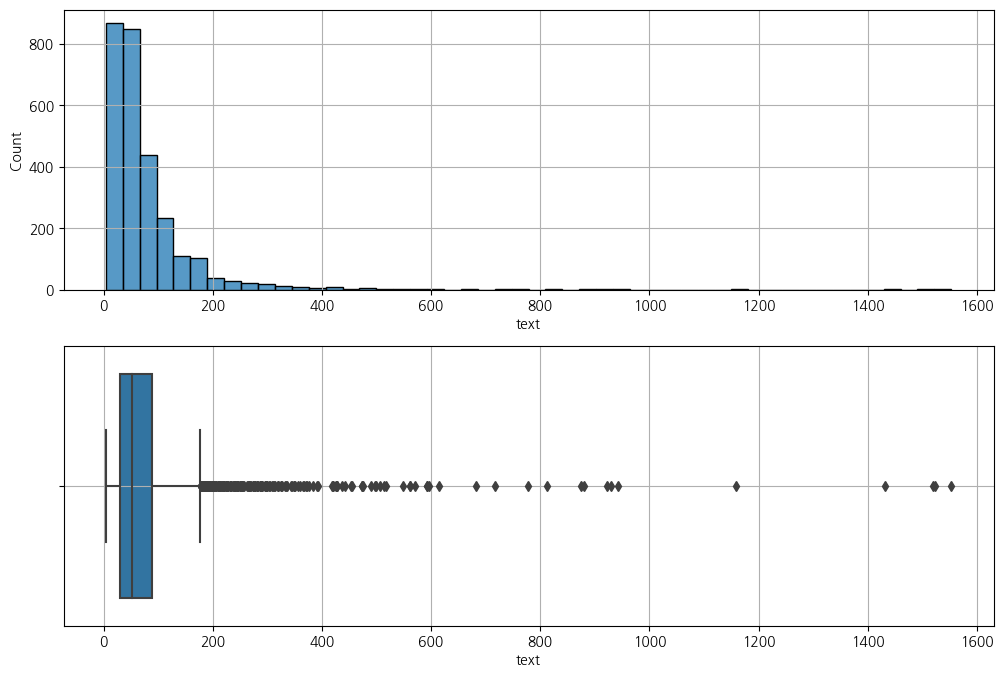

In [ ]:
#train_word_counts = X_mor_tr.apply(lambda x:len(x.split(' ')))
train_word_counts = X_mor_tr.apply(lambda x:len(x))
display(pd.DataFrame(train_word_counts).describe().T)
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
sns.histplot(train_word_counts, bins=50)
plt.grid()
plt.subplot(2,1,2)
sns.boxplot(x=train_word_counts)
plt.grid()
plt.show()

In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer_str = text.Tokenizer(num_words=TOP_K, char_level=False)
tokenizer_str.fit_on_texts(X_mor_tr_str)
X_mor_tr_seq_str = tokenizer_str.texts_to_sequences(X_mor_tr_str)
X_mor_val_seq_str = tokenizer_str.texts_to_sequences(X_mor_val_str)
# X_mor_te_seq_str = tokenizer_str.texts_to_sequences(X_mor_te_str)

max_length = len(max(X_mor_tr_seq_str, key=len))
if max_length > MAX_SEQUENCE_LENGTH:
    max_length = MAX_SEQUENCE_LENGTH

print(max_length)
X_mor_tr_seq_str = pad_sequences(X_mor_tr_seq_str, maxlen=max_length)
X_mor_val_seq_str = pad_sequences(X_mor_val_seq_str, maxlen=max_length)
# X_mor_te_seq_str = sequence.pad_sequences(X_mor_te_seq_str, maxlen=max_length)

500


In [45]:
tokenizer = text.Tokenizer(num_words=TOP_K, char_level=False)
tokenizer.fit_on_texts(X_mor_tr)
X_mor_tr_seq = tokenizer.texts_to_sequences(X_mor_tr)
X_mor_val_seq = tokenizer.texts_to_sequences(X_mor_val)
# X_mor_te_seq = tokenizer.texts_to_sequences(X_mor_te)

max_length = len(max(X_mor_tr_seq, key=len))
if max_length > MAX_SEQUENCE_LENGTH:
    max_length = MAX_SEQUENCE_LENGTH

print(max_length)
X_mor_tr_seq = pad_sequences(X_mor_tr_seq, maxlen=max_length)
X_mor_val_seq = pad_sequences(X_mor_val_seq, maxlen=max_length)
# X_mor_te_seq = sequence.pad_sequences(X_mor_te_seq, maxlen=max_length)

500


In [46]:
import pickle
def file_path(path):
    return PATH +"/"+path
# saving
with open(file_path('tokenizer.pickle'), 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
len(tokenizer.word_index)+1

9304

In [ ]:
X_mor_tr_str[2622]

'기존/NNG 에/JKB 있/VV 던/ETM 파일/NNG 을/JKO 삭제/NNG 해서/XSV+EC 윈도우/NNP 10/SN ./SF ova/SL 가져오/VV 기/ETN 가/JKS 안/MAG 되/VV 는데/EC 혹시/MAG 다시/MAG 파일/NNG 새로/MAG 주/VV 실/EP+ETM 수/NNB 있/VV 나요/EF ?/SF'

정수 시퀀스로 변환

In [ ]:
tokenizer_str.texts_to_sequences(X_mor_tr_str[2622])

[[105],
 [],
 [],
 [96],
 [96],
 [488],
 [],
 [31],
 [],
 [201],
 [231],
 [102],
 [],
 [36],
 [],
 [353],
 [353],
 [],
 [241],
 [],
 [369],
 [332],
 [220],
 [],
 [1531],
 [212],
 [],
 [96],
 [96],
 [488],
 [],
 [26],
 [],
 [201],
 [231],
 [947],
 [],
 [4925],
 [125],
 [],
 [96],
 [96],
 [488],
 [],
 [74],
 [185],
 [],
 [58],
 [160],
 [353],
 [],
 [369],
 [134],
 [],
 [],
 [71],
 [],
 [],
 [96],
 [96],
 [229],
 [],
 [32],
 [48],
 [],
 [160],
 [96],
 [],
 [],
 [],
 [160],
 [214],
 [],
 [947],
 [353],
 [56],
 [],
 [160],
 [557],
 [],
 [27],
 [2718],
 [584],
 [],
 [353],
 [353],
 [],
 [105],
 [],
 [369],
 [332],
 [96],
 [],
 [27],
 [],
 [201],
 [231],
 [160],
 [],
 [65],
 [],
 [220],
 [56],
 [488],
 [],
 [44],
 [],
 [353],
 [353],
 [],
 [22],
 [289],
 [],
 [369],
 [134],
 [],
 [4073],
 [122],
 [],
 [220],
 [56],
 [488],
 [],
 [183],
 [122],
 [],
 [220],
 [56],
 [488],
 [],
 [1531],
 [212],
 [],
 [96],
 [96],
 [488],
 [],
 [1862],
 [50],
 [],
 [220],
 [56],
 [488],
 [],
 [75],
 [],
 [353],


In [ ]:
X_mor_tr[2622]

['기존/NNG',
 '에/JKB',
 '있/VV',
 '던/ETM',
 '파일/NNG',
 '을/JKO',
 '삭제/NNG',
 '해서/XSV+EC',
 '윈도우/NNP',
 '10/SN',
 './SF',
 'ova/SL',
 '가져오/VV',
 '기/ETN',
 '가/JKS',
 '안/MAG',
 '되/VV',
 '는데/EC',
 '혹시/MAG',
 '다시/MAG',
 '파일/NNG',
 '새로/MAG',
 '주/VV',
 '실/EP+ETM',
 '수/NNB',
 '있/VV',
 '나요/EF',
 '?/SF']

In [ ]:
tokenizer.texts_to_sequences(X_mor_tr[[2622]])

[[762,
  17,
  40,
  243,
  77,
  11,
  423,
  178,
  1511,
  137,
  4,
  2924,
  1222,
  87,
  10,
  54,
  35,
  23,
  119,
  126,
  77,
  649,
  337,
  333,
  45,
  40,
  51,
  16]]

In [ ]:
tokenizer_str.word_counts

OrderedDict([('기존', 37),
             ('nng', 33896),
             ('에', 2099),
             ('jkb', 6021),
             ('있', 1601),
             ('vv', 11828),
             ('던', 141),
             ('etm', 6726),
             ('파일', 440),
             ('을', 2713),
             ('jko', 4661),
             ('삭제', 75),
             ('해서', 316),
             ('xsv', 5900),
             ('ec', 13216),
             ('윈도우', 14),
             ('nnp', 1609),
             ('10', 259),
             ('sn', 10910),
             ('sf', 6832),
             ('ova', 5),
             ('sl', 37453),
             ('가져오', 19),
             ('기', 401),
             ('etn', 556),
             ('가', 2635),
             ('jks', 4991),
             ('안', 587),
             ('mag', 4839),
             ('되', 1284),
             ('는데', 1432),
             ('혹시', 297),
             ('다시', 275),
             ('새로', 44),
             ('주', 550),
             ('실', 99),
             ('ep', 3811),
             ('수', 

In [ ]:
tokenizer.word_counts

OrderedDict([('기존/nng', 37),
             ('에/jkb', 2087),
             ('있/vv', 760),
             ('던/etm', 141),
             ('파일/nng', 425),
             ('을/jko', 2349),
             ('삭제/nng', 75),
             ('해서/xsv+ec', 195),
             ('윈도우/nnp', 14),
             ('10/sn', 259),
             ('./sf', 4101),
             ('ova/sl', 5),
             ('가져오/vv', 19),
             ('기/etn', 397),
             ('가/jks', 2477),
             ('안/mag', 532),
             ('되/vv', 863),
             ('는데/ec', 1421),
             ('혹시/mag', 297),
             ('다시/mag', 274),
             ('새로/mag', 44),
             ('주/vv', 94),
             ('실/ep+etm', 95),
             ('수/nnb', 620),
             ('나요/ef', 559),
             ('?/sf', 2101),
             ('2/sn', 1385),
             ('출입문/nng', 1),
             ('구조/nng', 19),
             ('를/jko', 2181),
             ('교안/nng', 49),
             ('38/sn', 16),
             ('쪽/nnbc', 8),
             ('처럼/jkb', 121),
     

### 6-4. Word2Vec (gensim, optional)
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)
> * [pre-trained](https://ratsgo.github.io/embedding/downloaddata.html)

In [ ]:
from gensim.models import Word2Vec, FastText,KeyedVectors
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
SIZE = 128 # embedding_size
WINDOW = 3
MIN_COUNT = 1
w2v_model = Word2Vec(sentences=X_mor_tr,
                vector_size=SIZE,
                window=WINDOW,
                max_vocab_size=None,
                min_count=MIN_COUNT,
                workers=4,
                epochs=10,
                negative=5,
                sg=0)

In [ ]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words,index2word_set):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다.
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0


    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다.
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])

    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다.
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)

    return feature_vec

def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()
    index2word_set = set(model.wv.index_to_key)
    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다.
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent,index2word_set))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다.
    sent_embedding_vectors = np.stack(dataset)

    return sent_embedding_vectors

In [ ]:
nltk_pos.vocab().most_common(100)

[('(/SSO', 6450),
 (',/SC', 6342),
 ('-/SY', 5845),
 ('./SF', 5557),
 (')/SSC', 5517),
 ('_/SY', 5425),
 ('./SY', 5226),
 ('=/SY', 4081),
 ('하/XSV', 3605),
 ('가/JKS', 3373),
 ('을/JKO', 3228),
 ("'/SY", 3185),
 ('는/ETM', 3014),
 ('이/JKS', 2982),
 ('를/JKO', 2956),
 ('에/JKB', 2801),
 (':/SC', 2795),
 ('?/SF', 2773),
 ('[/SSO', 2688),
 ('1/SN', 2483),
 ('의/JKG', 2149),
 ('\\/SY', 1951),
 ('2/SN', 1921),
 ('습니다/EF', 1912),
 ('는데/EC', 1911),
 (']/SSC', 1815),
 ('고/EC', 1738),
 ('에서/JKB', 1679),
 ('//SC', 1613),
 ('는/JX', 1461),
 ('0/SN', 1457),
 ('로/JKB', 1424),
 ('으로/JKB', 1347),
 ('하/VV', 1190),
 ('면/EC', 1148),
 ('되/VV', 1134),
 ('것/NNB', 1093),
 ('3/SN', 1035),
 ('있/VV', 1013),
 ('i/SL', 919),
 ('in/SL', 911),
 ('a/SL', 890),
 ('x/SL', 866),
 ('!/SF', 850),
 ('수/NNB', 830),
 ('지/EC', 803),
 ('은/JX', 801),
 ('값/NNG', 801),
 ('데이터/NNG', 783),
 ('#/SY', 773),
 ('도/JX', 754),
 ('나요/EF', 738),
 ('같/VA', 735),
 ('문제/NNG', 725),
 ('"/SY', 723),
 ('때/NNG', 714),
 ('드립니다/VV+EF', 700),
 ('않/VX', 6

In [ ]:
pre_trained = Word2Vec.load(PATH+"/word2vec")
#pre_trained = KeyedVectors.load("ko.tsv",)
#pre_trained = Word2Vec.load("ko.tsv")

In [ ]:
for index, word in enumerate(w2v_model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(w2v_model.wv.index_to_key)} is {word}")
for index, word in enumerate(pre_trained.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(pre_trained.wv.index_to_key)} is {word}")

word #0/10523 is ,/SC
word #1/10523 is (/SSO
word #2/10523 is _/SY
word #3/10523 is ./SF
word #4/10523 is )/SSC
word #5/10523 is -/SY
word #6/10523 is ./SY
word #7/10523 is =/SY
word #8/10523 is 하/XSV
word #9/10523 is 가/JKS
word #0/358043 is 1
word #1/358043 is .
word #2/358043 is 0
word #3/358043 is 2
word #4/358043 is 의
word #5/358043 is ,
word #6/358043 is 이
word #7/358043 is 는
word #8/358043 is 다
word #9/358043 is )


In [ ]:
print(w2v_model.wv.similar_by_word("문제/NNG"))
print(pre_trained.wv.similar_by_word("문제"))

[('어디/NP', 0.7948752045631409), ('제/NP', 0.7903726100921631), ('풀이/NNG', 0.7422614097595215), ('case/SL', 0.7406641840934753), ('제/NP+JKG', 0.7292388081550598), ('혹시/MAG', 0.7281292676925659), ('이번/NNG', 0.7274901866912842), ('잘못/MAG', 0.7238864302635193), ('이/NP', 0.7229146957397461), ('예시/NNG', 0.7177392244338989)]
[('해결', 0.7485990524291992), ('문제점', 0.7430223822593689), ('이유', 0.7247400879859924), ('휘청이', 0.7205255031585693), ('논의', 0.7197678089141846), ('시시비비', 0.711897075176239), ('상황', 0.7107261419296265), ('불거질', 0.7100738286972046), ('인력난', 0.7081537842750549), ('더래도', 0.7055107355117798)]


In [ ]:
# 실행
# 훈련 문장에 대한 문장 임베딩을 생성하기 위해 train_sentences, 모델 및 SIZE를 인수로 사용하여 get_dataset() 함수를 호출합니다.
%%time
X_pr_tr = get_dataset(X_tr.apply(lambda x: mecab.morphs(x)), pre_trained, 100)
X_pr_val = get_dataset(X_val.apply(lambda x: mecab.morphs(x)), pre_trained, 100)
# X_pr_te = get_dataset(X_te.apply(lambda x: mecab.morphs(x)), pre_trained, 100)

CPU times: user 6.85 s, sys: 38.4 ms, total: 6.89 s
Wall time: 7.1 s


In [ ]:
np.save(file_path("X_pr_train"), arr = X_pr_tr)
np.save(file_path("X_pr_val"), arr = X_pr_val)
# np.save(file_path("X_pr_te"), arr = X_pr_te)

NameError: ignored

In [ ]:
# 실행
# 훈련 문장에 대한 문장 임베딩을 생성하기 위해 train_sentences, 모델 및 SIZE를 인수로 사용하여 get_dataset() 함수를 호출합니다.
X_w2v_tr = get_dataset(X_mor_tr, w2v_model, SIZE)
X_w2v_val = get_dataset(X_mor_val, w2v_model, SIZE)
# X_w2v_te = get_dataset(X_mor_te, w2v_model, SIZE)

In [ ]:
np.save(file_path("X_w2v_train"), arr = X_w2v_tr)
np.save(file_path("X_w2v_val"), arr = X_w2v_val)
# np.save(file_path("X_w2v_te"), arr = X_w2v_te)

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용

In [58]:
## 실습해보세요.
# shape 함수를 이용해서 만들어진 X_train, y_train, X_test, y_test shape을 확인해 봅니다.
import numpy as np
import scipy.sparse
print("X_train tfidf shape:", x_tr_tfidf.shape  )
print("X_val tfidf  shape:", x_val_tfidf.shape  )
# print("X_te tfidf  shape:", x_te_tfidf.shape  )

# 모델 학습시에 활용 가능하도록 전처리 데이터를 저장해보도록 하겠습니다.
# numpy의 save 함수를 이용합니다.
scipy.sparse.save_npz(file_path("X_tfidf_train"), x_tr_tfidf)
scipy.sparse.save_npz(file_path("X_tfidf_val"), x_val_tfidf)
# scipy.sparse.save_npz(file_path("X_tfidf_te"), x_te_tfidf)

X_train tfidf shape: (2779, 9303)
X_val tfidf  shape: (927, 9303)


In [48]:
print("X_mor_train seq shape:", X_mor_tr_seq.shape  )
print("X_mor_val seq shape:", X_mor_val_seq.shape  )
# print("X_mor_te seq shape:", X_mor_te_seq.shape  )
np.save(file_path("X_mor_sequence_train"), arr = X_mor_tr_seq)
np.save(file_path("X_mor_sequence_val"), arr = X_mor_val_seq)
# np.save(file_path("X_mor_sequence_te"), arr = X_mor_te_seq)

X_mor_train seq shape: (2779, 500)
X_mor_val seq shape: (927, 500)


In [59]:
print("y_train shape:", Y_tr.shape   )
print("y_val tfidf  shape:", Y_val.shape  )
np.save(file_path("y_train"), arr = Y_tr)
np.save(file_path("y_val"), arr = Y_val)

y_train shape: (2779,)
y_val tfidf  shape: (927,)
